# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [136]:
import pickle

import numpy as np

In [137]:
neutron = (1, 0)
proton = (1, 1)

In [138]:
from jitr.reactions import ElasticReaction

In [139]:
from jitr.optical_potentials import kduq

In [140]:
import rxmc
import elm

In [15]:
with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = rxmc.params.array_to_list(prior.rvs(1000), [p.name for p in elm.params])

In [16]:
target = (208, 82)
projectile = neutron
energy_lab = 20
rxn = ElasticReaction(target=target, projectile=projectile)

In [17]:
kduq_samples = kduq.get_samples_federal(projectile)

In [18]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=20, Ecm=19.903449469680808, mu=np.float64(954.6903694711453), k=np.float64(0.982788204101379), eta=np.float64(0.0))

In [19]:
elm_prior_params = [
    elm.elm.calculate_parameters(projectile, target, kinematics.Ecm, rxn.Ef, p)
    for p in prior_samples
]

In [20]:
isoscalar, isovector, so0, so1, coul, asym = (
    np.array(l) for l in zip(*elm_prior_params)
)

In [21]:
np.mean(asym) * np.mean(isovector[:,:3], axis=0)

array([2.46936513, 0.01719925, 1.18588558])

In [22]:
kduq_params = [
    kduq.calculate_params(projectile, target, kinematics.Elab, p) for p in kduq_samples
]

In [23]:
kduq_coul, kduq_central, kduq_so = (np.array(l) for l in zip(*kduq_params))

In [24]:
np.mean(kduq_central, axis=0)

array([42.84972517,  7.1957479 ,  0.71487971,  1.57565274,  7.1957479 ,
        0.71487971,  6.20241389,  7.39212527,  0.57457236])

In [25]:
np.mean(isoscalar, axis=0)

array([46.94752381,  6.19705342,  2.17306167,  6.90733503,  0.72974723,
        6.90733503,  0.72974723])

In [26]:
np.mean(isovector, axis=0)

array([11.67336242,  0.08130554,  5.60600458,  6.9094887 ,  0.72952374,
        6.9094887 ,  0.72952374])

In [27]:
np.mean(kduq_so, axis=0)

array([ 4.39717482,  6.50920067,  0.57430756, -0.04989921,  6.50920067,
        0.57430756])

In [28]:
np.mean(so0, axis=0)

array([5.58      , 0.        , 6.90733503, 0.72974723])

In [29]:
np.mean(so1, axis=0)

array([0.        , 0.        , 6.9094887 , 0.72952374])

In [30]:
np.mean(coul, axis=0)

array([82.        ,  6.90733503])

In [31]:
np.mean(asym, axis=0)

np.float64(0.21153846153846154)

In [32]:
np.std(isoscalar, axis=0)

array([1.78586685, 3.43035476, 0.787     , 0.18238614, 0.02482164,
       0.18238614, 0.02482164])

In [33]:
np.std(isovector, axis=0)

array([5.1385535 , 6.88008302, 2.11497204, 0.18150868, 0.02551352,
       0.18150868, 0.02551352])

In [34]:
np.std(so0, axis=0)

array([5.59552404e-14, 0.00000000e+00, 1.82386137e-01, 2.48216378e-02])

In [35]:
np.std(so1, axis=0)

array([0.        , 0.        , 0.18150868, 0.02551352])

In [36]:
np.std(coul, axis=0)

array([0.        , 0.18238614])

In [37]:
np.std(asym, axis=0)

np.float64(0.0)

In [38]:
r = np.linspace(0.1, 10, 100)
vso_kduq = kduq.spin_orbit(r, *np.mean(kduq_so, axis=0))
vso_elm = elm.spin_orbit(r, np.mean(asym), np.mean(so0, axis=0), np.mean(so1, axis=0))

vcentral_kduq = kduq.central(r, *np.mean(kduq_central, axis=0))
vcentral_elm = elm.central(r, np.mean(asym), np.mean(isoscalar, axis=0), np.mean(isovector,  axis=0) )

In [39]:
from matplotlib import pyplot as plt

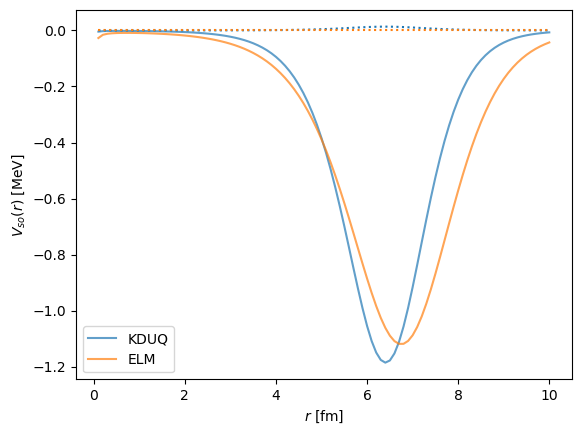

In [40]:
(p1,) = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vso_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V_{so}(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")

plt.legend()

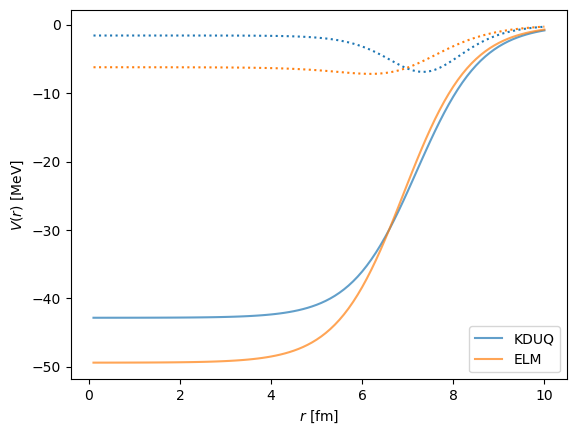

In [41]:
(p1,) = plt.plot(r, vcentral_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vcentral_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vcentral_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vcentral_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")
plt.legend()